In [88]:
import pandas as pd
from plotting import CandlePlot
pd.set_option("display.max_columns", None)

In [89]:
df_ma_res = pd.read_pickle("../data/ma_res.pkl")
df_ma_trades = pd.read_pickle("../data/ma_trades.pkl")

In [90]:
df_ma_res.granularity.unique()

array(['H1', 'H4'], dtype=object)

In [91]:
df_ma_res_h1 = df_ma_res[df_ma_res.granularity == "H1"].copy()
df_ma_trades_h1 = df_ma_trades[df_ma_trades.granularity == "H1"].copy()

In [92]:
df_ma_trades_h1.shape

(28784, 32)

In [93]:
df_ma_res_h1.columns

Index(['pair', 'num_trades', 'total_gain', 'mean_gain', 'min_gain', 'max_gain',
       'ma_l', 'ma_s', 'granularity', 'cross'],
      dtype='object')

In [94]:
df_cross_summary = df_ma_res_h1[[ 'num_trades', 'total_gain', 'cross']].copy()

In [95]:
df_cross_summary

,num_trades,total_gain,cross
0,220,-475.1,NaN
1,110,972.4,NaN
2,98,1230.2,NaN
3,70,745.2,NaN
4,56,430.7,NaN
...,...,...,...
481,40,-770.0,MA_40_MA_120
482,44,142.0,MA_10_MA_150
483,32,229.0,MA_20_MA_150
484,28,-301.0,MA_30_MA_150


In [96]:
df_cross_gr = df_cross_summary.groupby(by="cross", as_index=False).sum()
df_cross_gr.sort_values(by="total_gain", ascending=False, inplace=True)

In [97]:
df_cross_gr.head()

,cross,num_trades,total_gain
3,MA_10_MA_40,2098,6765.0
11,MA_30_MA_40,2093,2896.0
7,MA_20_MA_40,1789,2837.0
2,MA_10_MA_20,3867,1207.0
4,MA_10_MA_80,1322,-2330.0


In [98]:
df_ma_res_h1.head()

,pair,num_trades,total_gain,mean_gain,min_gain,max_gain,ma_l,ma_s,granularity,cross
0,EUR_USD,220,-475.1,-2.159545,-100.3,211.9,MA_20,MA_10,H1,NaN
1,EUR_USD,110,972.4,8.840000,-91.7,350.6,MA_40,MA_10,H1,NaN
2,EUR_USD,98,1230.2,12.553061,-96.4,339.0,MA_40,MA_20,H1,NaN
3,EUR_USD,70,745.2,10.645714,-86.2,343.2,MA_80,MA_10,H1,NaN
4,EUR_USD,56,430.7,7.691071,-135.6,330.4,MA_80,MA_20,H1,NaN


In [99]:
total_pairs = len(df_ma_res_h1.pair.unique())

In [100]:
temp = df_ma_res_h1[df_ma_res_h1.cross == "MA_10_MA_40"]

In [101]:
temp[temp.total_gain > 0].shape[0]

11

In [102]:
for c in df_ma_res_h1.cross.unique():
    temp = df_ma_res_h1[df_ma_res_h1.cross == c]
    pg = temp[temp.total_gain > 0].shape[0]
    print(f"{c} pg:{pg} perc gain:{(pg / total_pairs) * 100:.0f}%")

nan pg:0 perc gain:0%
MA_10_MA_20 pg:7 perc gain:47%
MA_10_MA_40 pg:11 perc gain:73%
MA_20_MA_40 pg:9 perc gain:60%
MA_30_MA_40 pg:10 perc gain:67%
MA_10_MA_80 pg:6 perc gain:40%
MA_20_MA_80 pg:8 perc gain:53%
MA_30_MA_80 pg:8 perc gain:53%
MA_40_MA_80 pg:8 perc gain:53%
MA_10_MA_120 pg:5 perc gain:33%
MA_20_MA_120 pg:8 perc gain:53%
MA_30_MA_120 pg:7 perc gain:47%
MA_40_MA_120 pg:9 perc gain:60%
MA_10_MA_150 pg:9 perc gain:60%
MA_20_MA_150 pg:7 perc gain:47%
MA_30_MA_150 pg:7 perc gain:47%
MA_40_MA_150 pg:8 perc gain:53%


In [103]:
cross = "MA_10_MA_20"
df_MA_10_MA_20 = df_ma_res_h1[df_ma_res_h1.cross == cross].copy()
df_MA_10_MA_20.sort_values(by="total_gain", ascending=False, inplace=True)

In [104]:
df_MA_10_MA_20

,pair,num_trades,total_gain,mean_gain,min_gain,max_gain,ma_l,ma_s,granularity,cross
374,GBP_JPY,214,2063.0,9.0,-264.0,644.0,MA_20,MA_10,H1,MA_10_MA_20
326,USD_JPY,206,1758.0,8.0,-157.0,331.0,MA_20,MA_10,H1,MA_10_MA_20
278,EUR_JPY,211,1281.0,6.0,-278.0,376.0,MA_20,MA_10,H1,MA_10_MA_20
470,CAD_JPY,211,947.0,4.0,-93.0,212.0,MA_20,MA_10,H1,MA_10_MA_20
438,AUD_JPY,197,514.0,2.0,-98.0,264.0,MA_20,MA_10,H1,MA_10_MA_20
422,AUD_USD,210,351.0,1.0,-102.0,179.0,MA_20,MA_10,H1,MA_10_MA_20
294,EUR_AUD,208,185.0,0.0,-99.0,218.0,MA_20,MA_10,H1,MA_10_MA_20
454,AUD_CAD,211,-17.0,0.0,-57.0,116.0,MA_20,MA_10,H1,MA_10_MA_20
342,USD_CAD,210,-150.0,0.0,-93.0,210.0,MA_20,MA_10,H1,MA_10_MA_20
390,GBP_AUD,196,-195.0,0.0,-149.0,268.0,MA_20,MA_10,H1,MA_10_MA_20


In [105]:
df_gains = df_ma_trades_h1[(df_ma_trades_h1.cross==cross)&
                            (df_ma_trades_h1.pair=="CAD_JPY")].copy()

In [106]:
 df_gains.head(3)

,time,volume,mid_o,mid_h,mid_l,mid_c,bid_o,bid_h,bid_l,bid_c,ask_o,ask_h,ask_l,ask_c,MA_40,MA_10,MA_80,MA_20,DELTA,DELTA_PREV,TRADE,DIFF,GAIN,granularity,pair,GAIN_C,ma_l,ma_s,MA_150,MA_120,MA_30,cross
40005,2023-06-07 15:00:00+00:00,6786,104.614,104.812,104.608,104.732,104.605,104.804,104.598,104.722,104.623,104.821,104.617,104.743,104.039725,104.1367,104.055337,104.0812,0.0555,-0.01180,1,0.034,3.4,H1,CAD_JPY,3.4,MA_20,MA_10,103.496047,103.701367,104.090133,MA_10_MA_20
40006,2023-06-08 09:00:00+00:00,3626,104.790,104.810,104.721,104.766,104.781,104.800,104.709,104.756,104.799,104.820,104.732,104.777,104.383950,104.7091,104.221962,104.7332,-0.0241,0.00805,-1,-0.303,30.3,H1,CAD_JPY,33.7,MA_20,MA_10,103.731433,103.998275,104.478967,MA_10_MA_20
40007,2023-06-09 06:00:00+00:00,3514,104.274,104.486,104.242,104.463,104.263,104.475,104.232,104.453,104.284,104.496,104.251,104.473,104.428850,104.1370,104.220938,104.1190,0.0180,-0.04045,1,0.036,3.6,H1,CAD_JPY,37.3,MA_20,MA_10,103.953280,104.169958,104.315033,MA_10_MA_20


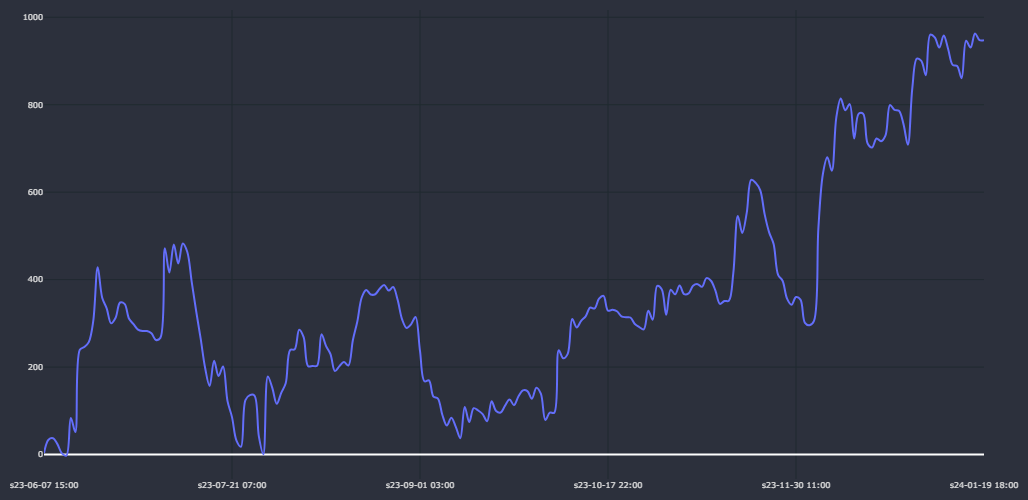

In [107]:
cp = CandlePlot(df_gains, candles=False)
cp.show_plot(line_traces=['GAIN_C'])

GBP_JPY 2063.899999999987


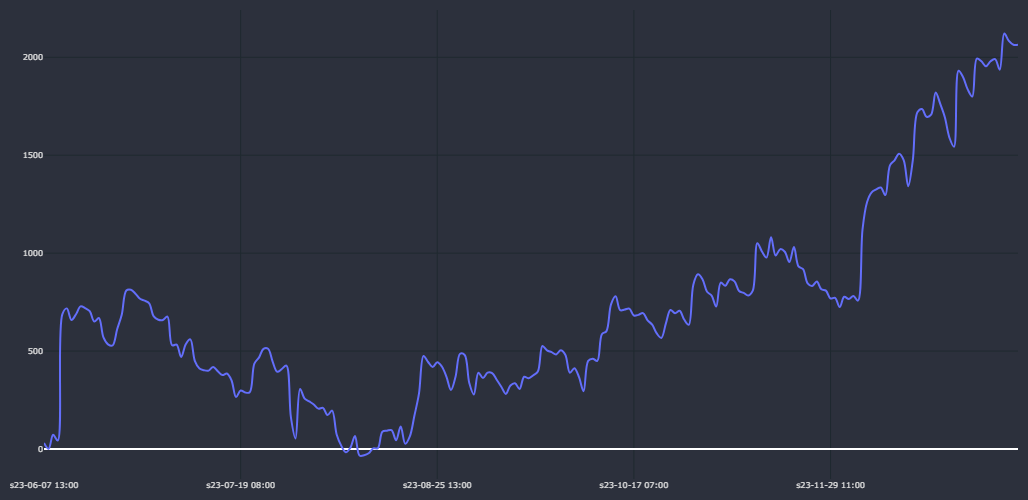

USD_JPY 1758.6000000000126


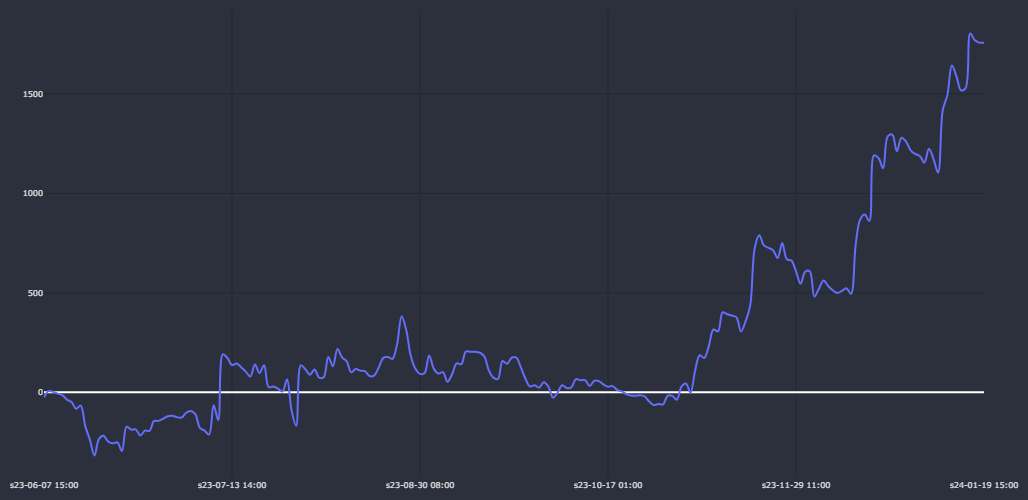

EUR_JPY 1281.3000000000015


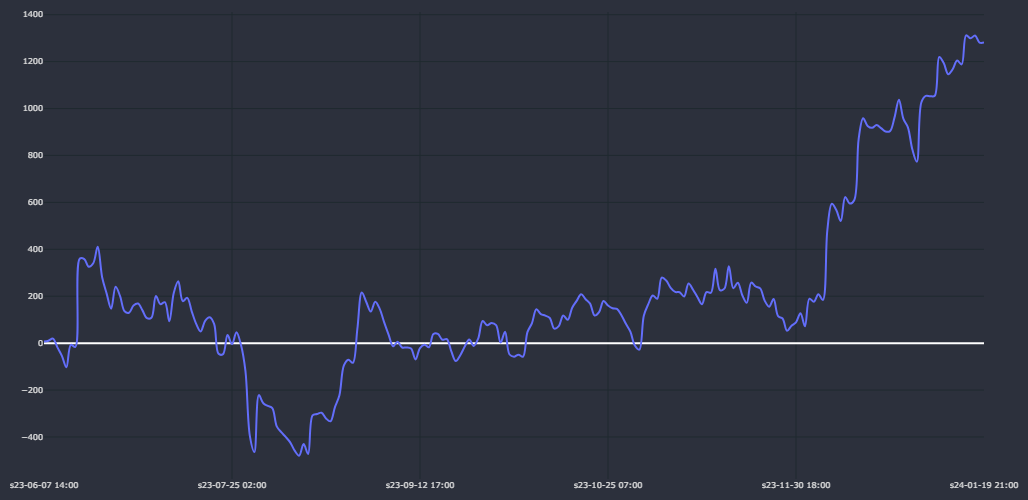

CAD_JPY 947.5999999999885


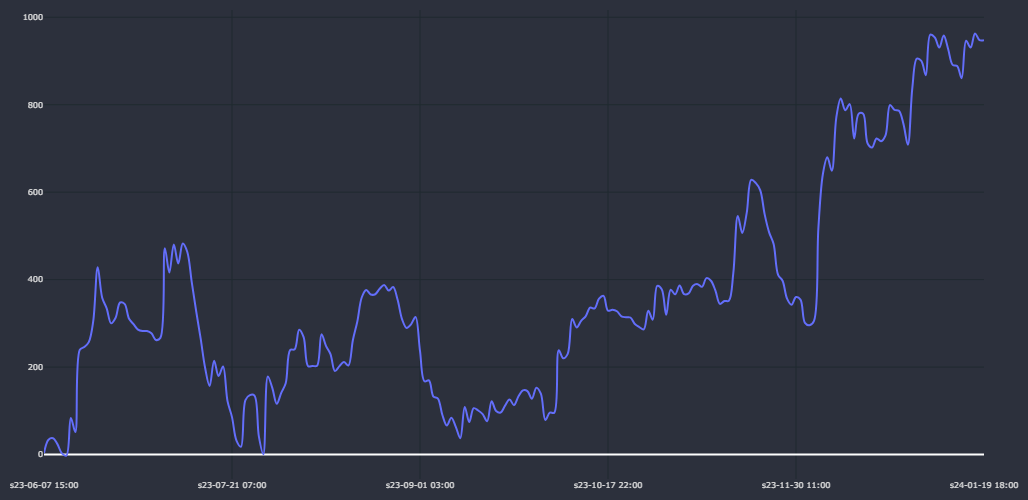

AUD_JPY 514.7999999999868


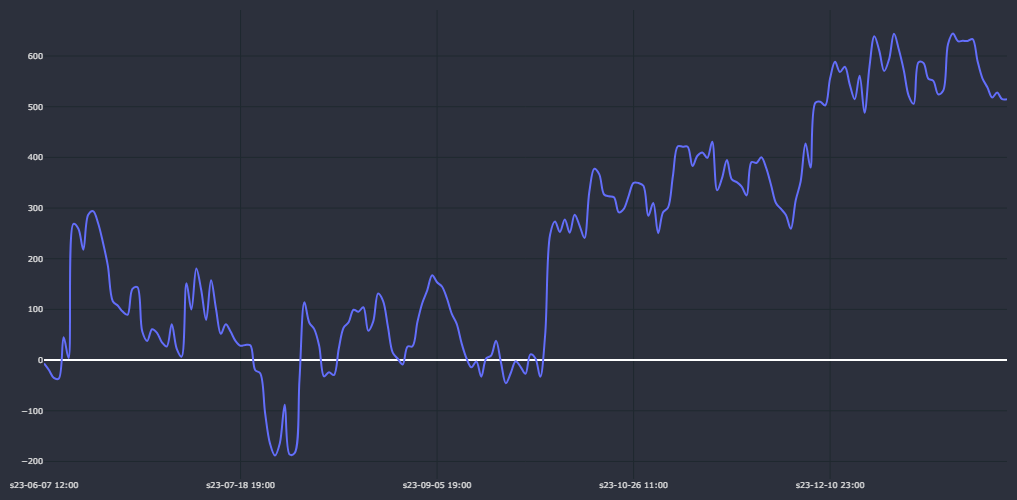

AUD_USD 351.4000000000217


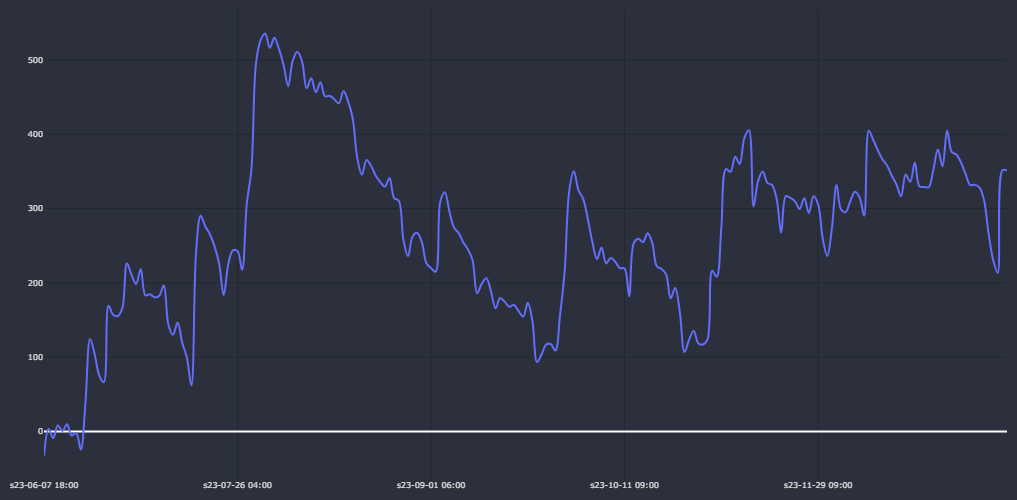

EUR_AUD 185.19999999997634


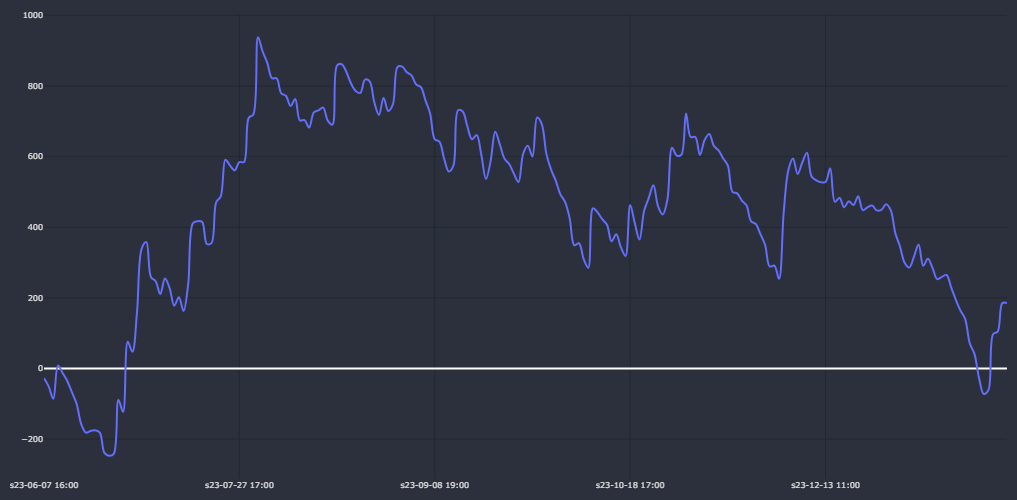

In [113]:
for curr in df_MA_10_MA_20[df_MA_10_MA_20.total_gain > 0].pair.unique():
    temp_gains = df_ma_trades_h1[(df_ma_trades_h1.cross==cross)&
                           (df_ma_trades_h1.pair==curr)].copy()
    print(curr, temp_gains.GAIN.sum())
    cp = CandlePlot(temp_gains, candles=False)
    cp.show_plot(line_traces=['GAIN_C'])